In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os
import torch as pt
from tqdm import tqdm

# Add the project root
sys.path.append(os.path.abspath('../../'))

from src.useful_functions import read_dirs_paths
from src.isokann.modules import *

# For matplotlib
font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# For reproducibility
np.random.seed(0)
pt.manual_seed(0)

# Read directory paths
read_dirs_paths('dir_paths.txt', globals())

device = pt.device("cuda" if pt.cuda.is_available() else "cpu")
print("")
print(device)


Created variables:
inp_dir = input/
out_trajectories1 = output/trajectories/
out_trajectories2 = output/trajectories/openmm_files/
out_trajectories3 = output/trajectories/openmm_files/initial_states/
out_trajectories4 = output/trajectories/openmm_files/final_states/
out_isokann = output/isokann/
out_mokito = output/mokito/

cuda


In [4]:
# Load initial and final states and convert to torch
D0 = pt.load(out_trajectories1 + 'PWDistances_0.pt', map_location=device)
DT = pt.load(out_trajectories1 + 'PWDistances_t.pt', map_location=device)
R0 = np.loadtxt(out_trajectories1 + 'R0.txt')

Npoints = D0.shape[0]
Ndims   = D0.shape[1]

Nfinpoints  = DT.shape[1]
Nframes     = DT.shape[3]


frame = 0
Dt = pt.clone(DT[frame,:,:,:])

In [5]:

# Find the optimal hyperparameters using random search
NN_layers =          [(Ndims, int(2*Ndims/3), 1), 
                      (Ndims, int(Ndims/2), 1), 
                      (Ndims, int(Ndims/3), 1)]


learning_rates = [0.01, 
                  0.001, 
                  0.0001]

weight_decays = [0.001, 0.0001, 0.00001]

best_hyperparams, best_val_loss = random_search(D0, Dt, 
                                                NN_layers, 
                                                learning_rates, 
                                                weight_decays, 
                                                batch_size = 200,
                                                search_iterations=15)

print(" ")
print("The best hyperparameters are:", best_hyperparams)
print("The best validation loss is:",  best_val_loss)
print(" ")


  0%|          | 0/15 [00:00<?, ?it/s]

Testing learning rate = 0.0001
Testing weight decays = 0.001
Testing layers = [2628 1314    1]


  7%|▋         | 1/15 [00:06<01:31,  6.55s/it]

Validation loss: tensor(0.0029, device='cuda:0')
Testing learning rate = 0.01
Testing weight decays = 0.001
Testing layers = [2628 1314    1]


 13%|█▎        | 2/15 [00:12<01:22,  6.36s/it]

Validation loss: tensor(0.0349, device='cuda:0')
Testing learning rate = 0.01
Testing weight decays = 0.001
Testing layers = [2628  876    1]


 20%|██        | 3/15 [00:18<01:14,  6.22s/it]

Validation loss: tensor(0.0838, device='cuda:0')
Testing learning rate = 0.001
Testing weight decays = 0.001
Testing layers = [2628  876    1]


 27%|██▋       | 4/15 [00:24<01:07,  6.16s/it]

Validation loss: tensor(0.0025, device='cuda:0')
Testing learning rate = 0.0001
Testing weight decays = 0.0001
Testing layers = [2628 1314    1]


 33%|███▎      | 5/15 [00:31<01:01,  6.14s/it]

Validation loss: tensor(0.0026, device='cuda:0')
Testing learning rate = 0.001
Testing weight decays = 0.0001
Testing layers = [2628 1752    1]


 40%|████      | 6/15 [00:36<00:54,  6.06s/it]

Validation loss: tensor(0.0026, device='cuda:0')
Testing learning rate = 0.001
Testing weight decays = 0.001
Testing layers = [2628  876    1]


 47%|████▋     | 7/15 [00:42<00:48,  6.06s/it]

Validation loss: tensor(0.0026, device='cuda:0')
Testing learning rate = 0.0001
Testing weight decays = 0.001
Testing layers = [2628 1314    1]


 53%|█████▎    | 8/15 [00:48<00:42,  6.04s/it]

Validation loss: tensor(0.0031, device='cuda:0')
Testing learning rate = 0.0001
Testing weight decays = 0.001
Testing layers = [2628 1314    1]


 60%|██████    | 9/15 [00:55<00:36,  6.05s/it]

Validation loss: tensor(0.0032, device='cuda:0')
Testing learning rate = 0.0001
Testing weight decays = 1e-05
Testing layers = [2628 1752    1]


 67%|██████▋   | 10/15 [01:01<00:30,  6.10s/it]

Validation loss: tensor(0.0025, device='cuda:0')
Testing learning rate = 0.01
Testing weight decays = 0.0001
Testing layers = [2628 1752    1]


 73%|███████▎  | 11/15 [01:07<00:24,  6.16s/it]

Validation loss: tensor(0.1751, device='cuda:0')
Testing learning rate = 0.001
Testing weight decays = 0.001
Testing layers = [2628 1314    1]


 80%|████████  | 12/15 [01:13<00:18,  6.02s/it]

Validation loss: tensor(0.0025, device='cuda:0')
Testing learning rate = 0.0001
Testing weight decays = 0.0001
Testing layers = [2628  876    1]


 87%|████████▋ | 13/15 [01:18<00:11,  5.91s/it]

Validation loss: tensor(0.0025, device='cuda:0')
Testing learning rate = 0.001
Testing weight decays = 0.0001
Testing layers = [2628 1752    1]


 93%|█████████▎| 14/15 [01:25<00:06,  6.04s/it]

Validation loss: tensor(0.0030, device='cuda:0')
Testing learning rate = 0.0001
Testing weight decays = 0.001
Testing layers = [2628  876    1]


100%|██████████| 15/15 [01:31<00:00,  6.10s/it]

Validation loss: tensor(0.0030, device='cuda:0')
 
The best hyperparameters are: {'nodes': array([2628,  876,    1]), 'learning_rate': 0.0001, 'weight_decay': 0.0001}
The best validation loss is: tensor(0.0025, device='cuda:0')
 


In [6]:
NNnodes =  best_hyperparams['nodes']
print("FNN layers:", NNnodes)

lr      = best_hyperparams['learning_rate'] 
print("lr = ", lr)

wd = best_hyperparams['weight_decay']
print("wd = ", wd)

np.savetxt(out_isokann + 'NNnodes.txt', NNnodes)

# Define the interpolating function
f_NN = NeuralNetwork( Nodes = np.asarray(NNnodes) ).to(device)

# Apply the power method using the best hyperparameters
train_LOSS, val_LOSS, best_loss = power_method(D0, Dt, 
                                               f_NN, 
                                               scale_and_shift, 
                                               Niters = 200, 
                                               Nepochs = 20,
                                               tolerance  = 5e-4, 
                                               lr = lr,
                                               wd=wd,
                                               batch_size = 200,  
                                               print_eta  = True
                                              )

FNN layers: [2628  876    1]
lr =  0.0001
wd =  0.0001


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:23<00:00,  8.62it/s]


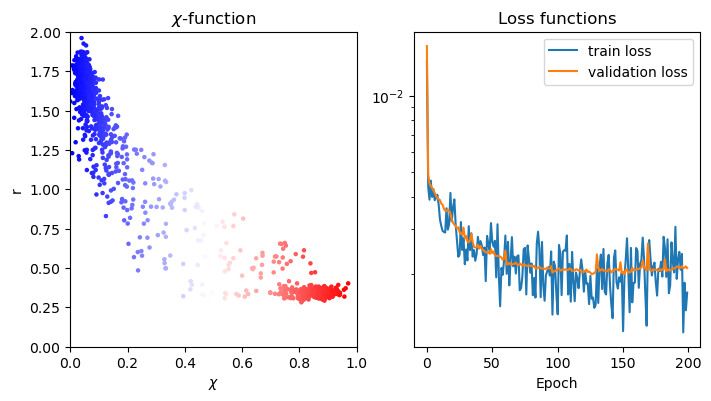

In [15]:
npX0 = D0.cpu().detach().numpy()
chi  = f_NN(D0).cpu().detach().numpy()

fig, ax = plt.subplots(1, 2, figsize=(16*in2cm, 8*in2cm), facecolor='white')


pos = ax[0].scatter( chi, R0, c = chi,  cmap = cm.bwr , s = 5 )

ax[0].set_title('$\chi$-function')
ax[0].set_xlim((0,1))
ax[0].set_ylim(0,2)
ax[0].set_ylabel('r')
ax[0].set_xlabel(r'$\chi$')


ax[1].plot(train_LOSS, label='train loss')
ax[1].plot(val_LOSS, label='validation loss')
ax[1].semilogy()
ax[1].set_xlabel('Epoch')
ax[1].set_title('Loss functions')
ax[1].legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.5)
#fig.savefig('chi.png', format='png', dpi=900, bbox_inches='tight')

In [12]:
pt.save(f_NN.state_dict(), out_isokann  + 'f_NN.pt')
np.savetxt(out_isokann  + 'val_LOSS.txt', val_LOSS)
np.savetxt(out_isokann  + 'train_LOSS.txt', train_LOSS)
np.savetxt(out_isokann + 'chi0_.txt', chi)

# Calculate propagated chi
#chit = f_NN(Xtau).cpu().detach().numpy()
#np.save(out_isokann + 'chit.npy', chit)
